In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sols = "../data/sols.csv"
data = pd.read_csv(sols)
df = pd.DataFrame(data)

In [11]:
df.shape

(50, 11)

In [9]:
df.head()

,parcelle_id,latitude,longitude,type_sol,surface_ha,capacite_retention_eau,ph,matiere_organique,azote,phosphore,potassium
0,P001,33.851150,-5.524178,argileux,8.23,0.83,7.1,3.55,0.254,30.4,282.9
1,P002,33.857681,-5.558493,sablo-limoneux,12.08,0.44,7.0,1.68,0.145,26.4,234.9
2,P003,33.895936,-5.557662,argileux,17.84,0.87,7.8,4.12,0.200,43.6,338.0
3,P004,33.905011,-5.578778,argilo-limoneux,8.53,0.72,7.5,3.44,0.219,44.7,224.1
4,P005,33.853555,-5.520650,sablo-limoneux,5.18,0.54,6.5,2.26,0.105,31.2,184.1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   parcelle_id             50 non-null     object 
 1   latitude                50 non-null     float64
 2   longitude               50 non-null     float64
 3   type_sol                50 non-null     object 
 4   surface_ha              50 non-null     float64
 5   capacite_retention_eau  50 non-null     float64
 6   ph                      50 non-null     float64
 7   matiere_organique       50 non-null     float64
 8   azote                   50 non-null     float64
 9   phosphore               50 non-null     float64
 10  potassium               50 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.4+ KB


In [13]:
df.isnull().sum()

parcelle_id               0
latitude                  0
longitude                 0
type_sol                  0
surface_ha                0
capacite_retention_eau    0
ph                        0
matiere_organique         0
azote                     0
phosphore                 0
potassium                 0
dtype: int64

In [14]:
np.unique(df.duplicated())

array([False])

In [15]:
np.unique(df["type_sol"])

array(['argileux', 'argilo-limoneux', 'sablo-limoneux'], dtype=object)

In [28]:
df.describe()

,latitude,longitude,surface_ha,capacite_retention_eau,ph,matiere_organique,azote,phosphore,potassium
count,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,33.878093,-5.552706,13.191400,0.7128,7.036000,3.193000,0.202560,40.030000,259.81200
std,0.022256,0.018271,4.742024,0.1469,0.483929,0.800302,0.045602,11.229321,52.12459
min,33.847741,-5.578778,5.060000,0.4200,6.000000,1.530000,0.103000,20.900000,150.20000
25%,33.857904,-5.564921,9.115000,0.5750,6.600000,2.612500,0.164000,31.200000,234.52500
50%,33.867839,-5.558111,13.145000,0.7650,7.100000,3.345000,0.204000,40.650000,270.60000
75%,33.899624,-5.533434,17.745000,0.8300,7.400000,3.800000,0.234500,49.350000,292.30000
max,33.908533,-5.520482,19.990000,0.8900,7.900000,4.390000,0.285000,59.200000,340.10000


In [18]:
df.columns

Index(['parcelle_id', 'latitude', 'longitude', 'type_sol', 'surface_ha',
       'capacite_retention_eau', 'ph', 'matiere_organique', 'azote',
       'phosphore', 'potassium'],
      dtype='object')

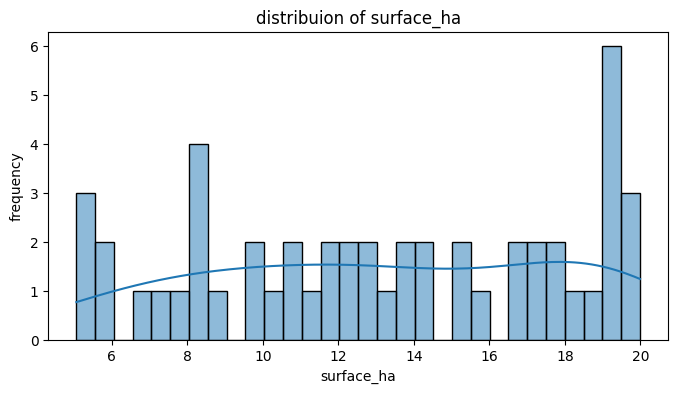

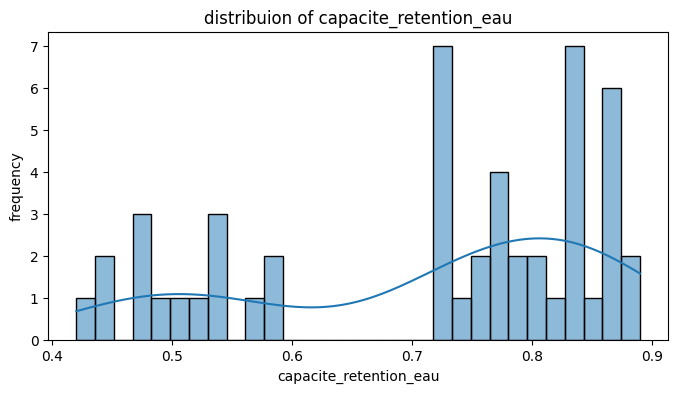

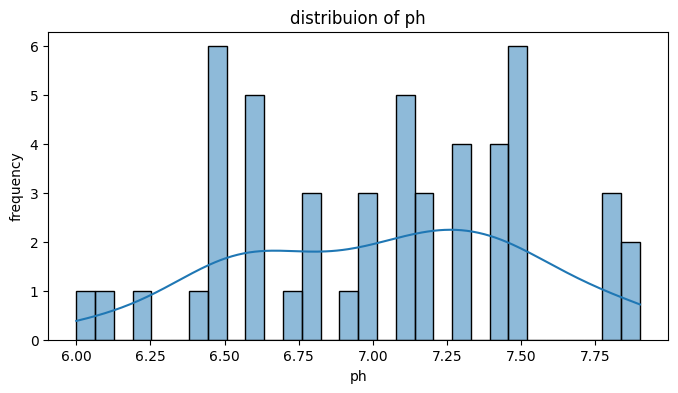

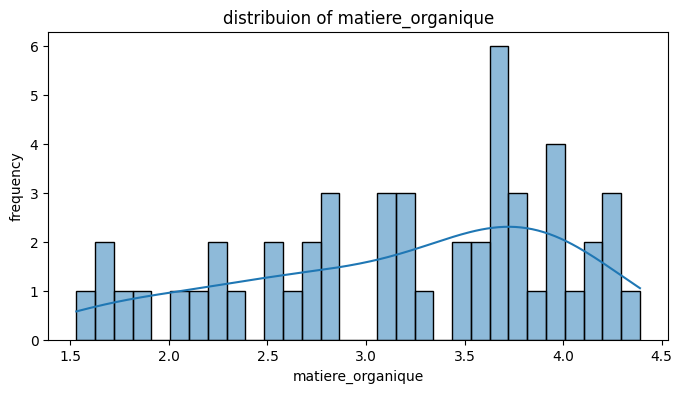

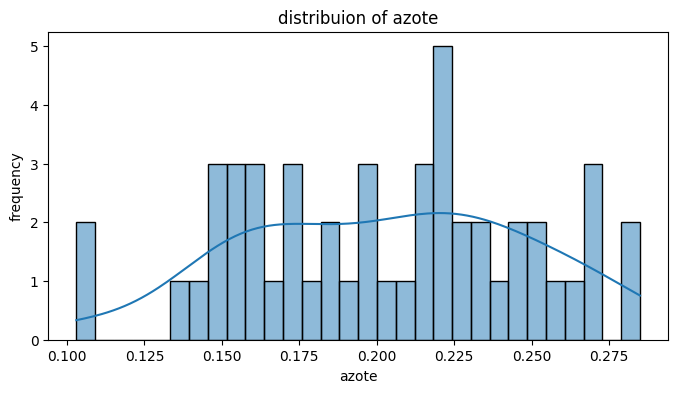

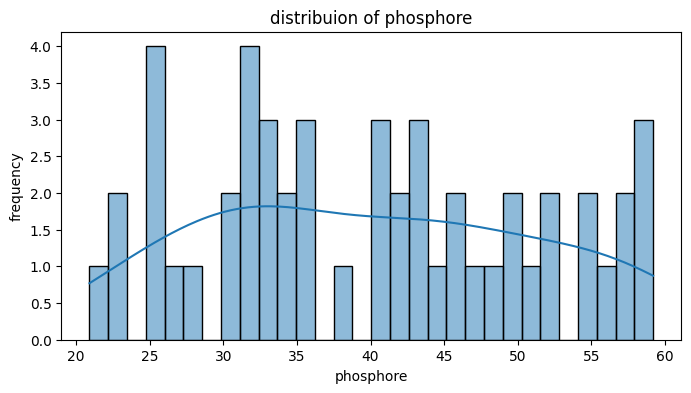

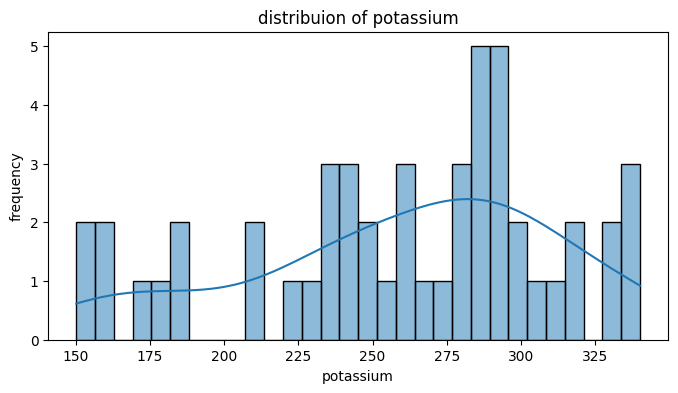

In [26]:
_columns = df.drop(columns=['parcelle_id', 'latitude', 'longitude', 'type_sol']).columns

for col in _columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"distribuion of {col}")
    plt.xlabel(col)
    plt.ylabel(f"frequency")
    plt.show()

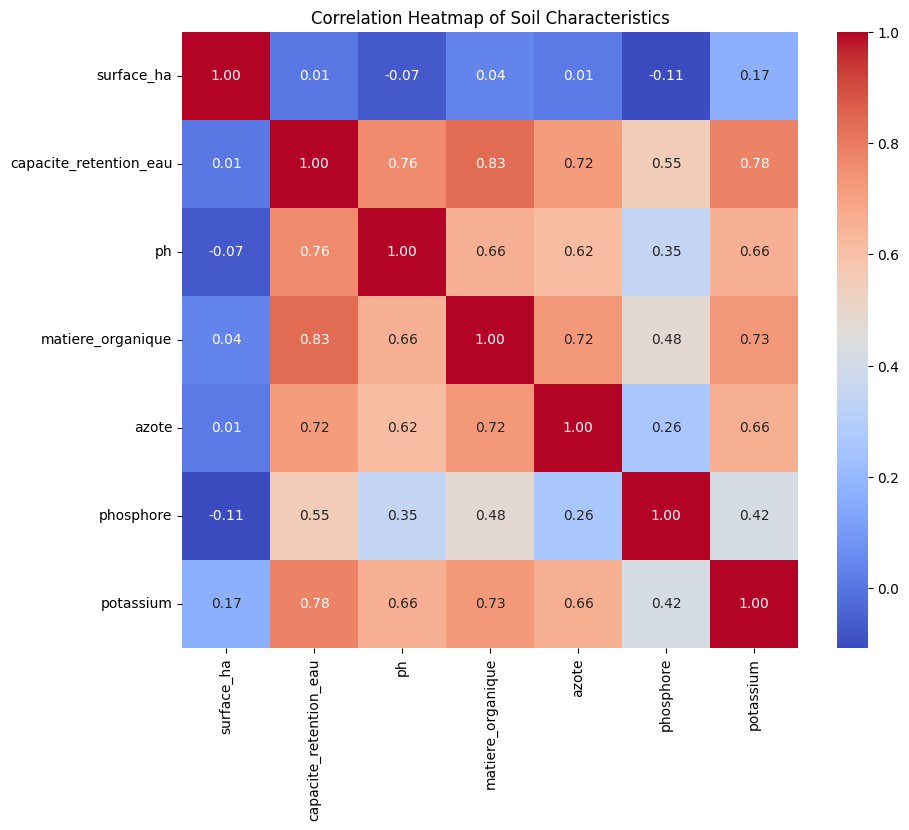

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Soil Characteristics")
plt.show()